In [17]:
%matplotlib widget

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import meshio

Generate the geometry with a parametric eq. 

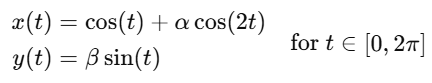

In [19]:
alpha = 0.65
beta = 1.5

t = np.linspace(0,2*np.pi,50)

x = np.cos(t) + alpha * np.cos(2*t)
y = beta * np.sin(t)

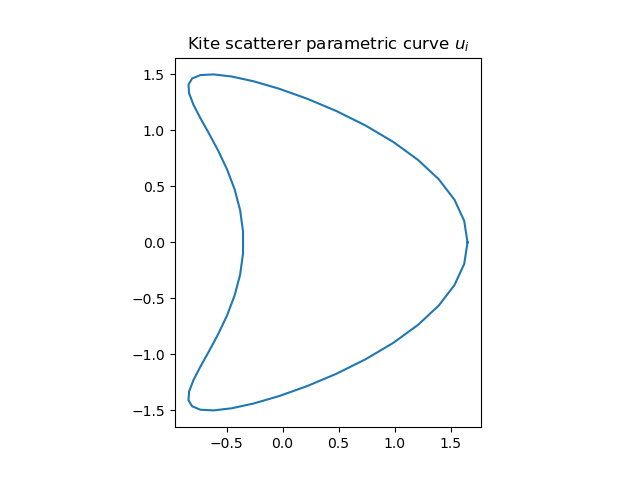

In [20]:
# Plot the surface
plt.close('all')

fig, ax = plt.subplots()
plot = ax.plot(x, y)
ax.axis('equal')

ax.set_aspect('equal', 'box')
plt.title(r"Kite scatterer parametric curve $u_i$")
plt.show()

In [21]:
sizeInner = 0.07

geom_file = open("kite_scatterer.geo", "w", encoding="utf-8")


geom_file.write(" /* \n " +
                ".geo file for kite scatterer, \n"+
                "Introduccion al Metodo de Frontera Universidad EAFIT 2025-1 \n"+
                "by: Daniel Ospina Pajoy, Sebastián Duque Lotero & Mateo Tabares. \n */ "+
                "\n \n \n"+
                "// Inner Scatterer Element Size"+
                f"\n sizeRoI = {sizeInner}; \n \n")

geom_file.write("// Points \n") 

pt_num = 1
for (xp,yp) in zip(x,y):
    if pt_num != len(x):
        geom_file.write(f"Point({pt_num}) = {{ {xp}, {yp}, 0.0, {sizeInner} }}; \n")
    pt_num += 1
geom_file.write("\n \n") 

geom_file.write("// Lines \n") 

for idx in range(1,len(x)):
    if idx != len(x)-1:
        geom_file.write(f"Line({idx}) = {{ {idx}, {idx+1} }}; \n")
    else:
        geom_file.write(f"Line({idx}) = {{ {idx}, 1 }}; \n")
geom_file.write("\n \n") 

geom_file.write("// Surfaces \n"+
                f"Curve Loop(1) = {{List [ {{ 1: {len(x)-1} }} ] }}; \n"+
               "Plane Surface(1) = {1}; \n") 
geom_file.write("\n \n") 

geom_file.write("// Physical groups \n"+
               f"Physical Curve(1) = {{List [ {{ 1: {len(x)-1} }} ] }}; \n"+
               "Physical Surface(2) = {1}; \n") 
geom_file.write("\n \n") 


ndiv = 2
geom_file.write("// Mesh parameters \n"+
               f"ndiv = {ndiv}; \n"+
               f"Transfinite Curve {{List [ {{ 1: {len(x)-1} }} ] }} = ndiv Using Progression 1; \n"
               "Transfinite Surface {1}; \n") 


    
geom_file.close()


In [22]:

#%% Pre-process
def read_geo_gmsh(fname, dir_groups, neu_groups):
    """Read the geometry from a Gmsh file with physical groups

    Parameters
    ----------
    fname : str
        Path to the mesh file.
    dir_groups : list
        List with the number of the physical groups associated
        with Dirichlet boundary conditions.
    neu_groups : list
        List with the number of the physical groups associated
        with Dirichlet boundary conditions.

    Returns
    -------
    mesh : meshio Mesh object
        Mesh object.
    coords : ndarray, float
        Coordinates for the endpoints of the elements in the
        boundary.
    elems : ndarray, int
        Connectivity for the elements.
    x_m : ndarray, float
        Horizontal component of the midpoint of the elements.
    y_m : ndarray, float
        Vertical component of the midpoint of the elements.
    id_dir : list
        Identifiers for elements with Dirichlet boundary conditions.
    id_neu : list
        Identifiers for elements with Neumann boundary conditions.
    """
    mesh = meshio.read(fname)
    elems_dir = np.vstack([mesh.cells[k].data for k in dir_groups])
    if neu_groups is None:
        elems_neu = np.array([])
        elems = elems_dir.copy()
    else:
        elems_neu = np.vstack([mesh.cells[k].data for k in neu_groups])
        elems = np.vstack((elems_dir, elems_neu))
    bound_nodes = list(set(elems.flatten()))
    coords = mesh.points[bound_nodes, :2]
    x_m, y_m = 0.5*(coords[elems[:, 0]] + coords[elems[:, 1]]).T
    id_dir = range(elems_dir.shape[0])
    id_neu = range(elems_dir.shape[0],
                   elems_dir.shape[0] + elems_neu.shape[0])
    return mesh, coords, elems, x_m, y_m, id_dir, id_neu


In [23]:
fname = "kite_scatterer.msh"
mesh = meshio.read(fname)

In [24]:
len(mesh.cells)

199

In [25]:
elems = np.vstack([cells.data for cells in mesh.cells[0:-1]])
elems

array([[    0,   199],
       [  199,   200],
       [  200,   201],
       ...,
       [63358, 63359],
       [63359, 63360],
       [63360,   198]], shape=(63360, 2))

In [26]:
bound_nodes = list(set(elems.flatten()))
bound_nodes


[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.int64(66),
 np.i

In [27]:
coords = mesh.points[bound_nodes, :2]
coords

array([[ 1.65      ,  0.        ],
       [ 1.64820604,  0.04735282],
       [ 1.64282984,  0.09465845],
       ...,
       [ 1.64815564, -0.04779631],
       [ 1.64817244, -0.04764848],
       [ 1.64818924, -0.04750065]], shape=(63361, 2))

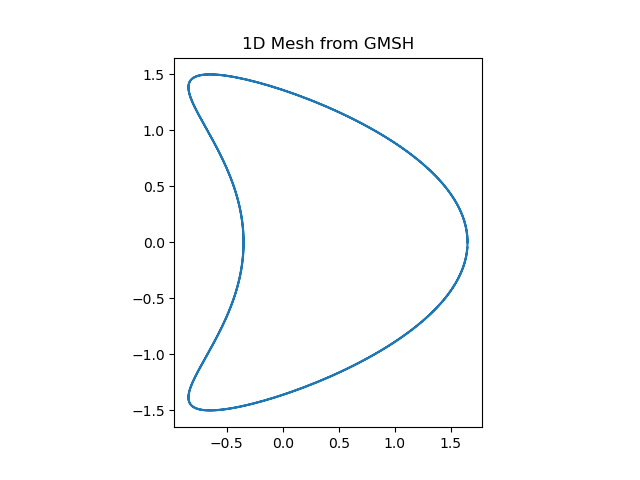

In [28]:
# Plot the surface
plt.close('all')

fig, ax = plt.subplots()
plot = ax.plot(coords[:,0], coords[:,1])
ax.axis('equal')

ax.set_aspect('equal', 'box')
plt.title(r"1D Mesh from GMSH")
plt.show()

In [29]:
read_geo_gmsh(fname, list(range(0,len(mesh.cells))), None)

(<meshio mesh object>
   Number of points: 63680
   Number of cells:
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
     line: 320
 